# Pandas数据分析示例：分析某股票最新数据

### 面授班讲义  by 杨庆跃
请安装最新版本Jupyter notebook进行编程实验

## 1、读取数据
乐视网的最新交易数据  
数据源来自雅虎财经，https://finance.yahoo.com/

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

stock = pd.read_csv('d:/ai/data/300104.SZ.csv',header=0,parse_dates=['Date'],index_col='Date',na_values=0)

In [20]:
pd.read_csv?

## 2、数据浏览与预处理
浏览数据格式及规模、各字段数据类型   
是否有缺失值及异常值  
是否需要做数据汇总  
是否需要做数据剔除  
是否需要生成新字段  
【提示】重要中间结果应保存

In [11]:
stock.head()
#stock.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-08-12,1.41480,1.43026,1.22221,1.22937,1.22937,534718334.0
2010-08-13,1.28803,1.31636,1.24539,1.27201,1.27201,314048914.0
2010-08-16,1.20190,1.24682,1.18816,1.23137,1.23137,213862173.0
2010-08-17,1.22507,1.25856,1.21849,1.24597,1.24597,141945776.0
2010-08-18,1.24768,1.25255,1.19474,1.20046,1.20046,149123438.0


In [10]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1.525000e+03
mean,10.880966,11.115947,10.705969,10.913003,10.913003,8.675318e+07
std,9.412242,9.605416,9.268161,9.436965,9.436965,6.951012e+07
min,0.957800,0.970100,0.955790,0.958080,0.958080,6.456000e+05
25%,2.453725,2.500000,2.408585,2.458735,2.458735,4.048843e+07
50%,8.250000,8.409090,8.106820,8.259090,8.259090,6.950962e+07
75%,16.354999,17.397500,16.152500,16.895001,16.895001,1.117248e+08
max,42.400002,44.750000,41.044998,41.244999,41.244999,8.783693e+08


#### 日期不连续，下面把日期补全

In [12]:
dates = pd.date_range(start='2010-08-12',end='2018-09-17',freq='D')
dates

DatetimeIndex(['2010-08-12', '2010-08-13', '2010-08-14', '2010-08-15',
               '2010-08-16', '2010-08-17', '2010-08-18', '2010-08-19',
               '2010-08-20', '2010-08-21',
               ...
               '2018-09-08', '2018-09-09', '2018-09-10', '2018-09-11',
               '2018-09-12', '2018-09-13', '2018-09-14', '2018-09-15',
               '2018-09-16', '2018-09-17'],
              dtype='datetime64[ns]', length=2959, freq='D')

In [16]:
stock=stock.reindex(dates)
stock.head(20)

,Open,High,Low,Close,Adj Close,Volume
2010-08-12,1.41480,1.43026,1.22221,1.22937,1.22937,534718334.0
2010-08-13,1.28803,1.31636,1.24539,1.27201,1.27201,314048914.0
2010-08-14,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-15,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-16,1.20190,1.24682,1.18816,1.23137,1.23137,213862173.0
2010-08-17,1.22507,1.25856,1.21849,1.24597,1.24597,141945776.0
2010-08-18,1.24768,1.25255,1.19474,1.20046,1.20046,149123438.0
2010-08-19,1.20046,1.22651,1.19331,1.20247,1.20247,99921160.0
2010-08-20,1.19274,1.21449,1.18759,1.20190,1.20190,85394607.0
2010-08-21,NaN,NaN,NaN,NaN,NaN,NaN


缺失的volumn填充为0,

In [17]:
stock['Volume'] = stock['Volume'].fillna(0)
stock.head(20)

,Open,High,Low,Close,Adj Close,Volume
2010-08-12,1.41480,1.43026,1.22221,1.22937,1.22937,534718334.0
2010-08-13,1.28803,1.31636,1.24539,1.27201,1.27201,314048914.0
2010-08-14,NaN,NaN,NaN,NaN,NaN,0.0
2010-08-15,NaN,NaN,NaN,NaN,NaN,0.0
2010-08-16,1.20190,1.24682,1.18816,1.23137,1.23137,213862173.0
2010-08-17,1.22507,1.25856,1.21849,1.24597,1.24597,141945776.0
2010-08-18,1.24768,1.25255,1.19474,1.20046,1.20046,149123438.0
2010-08-19,1.20046,1.22651,1.19331,1.20247,1.20247,99921160.0
2010-08-20,1.19274,1.21449,1.18759,1.20190,1.20190,85394607.0
2010-08-21,NaN,NaN,NaN,NaN,NaN,0.0


其余缺失值向下填充

In [22]:
stock.fillna(method='ffill', inplace=True)
stock.head(20)
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2.959000e+03
mean,10.799680,11.037078,10.627152,10.832516,10.832516,4.471058e+07
std,9.377867,9.580426,9.239183,9.409853,9.409853,6.610383e+07
min,0.957800,0.970100,0.955790,0.958080,0.958080,0.000000e+00
25%,2.430120,2.486780,2.390000,2.442710,2.442710,0.000000e+00
50%,8.150000,8.361360,7.959090,8.097730,8.097730,1.866974e+07
75%,16.344999,17.538601,16.180000,16.959999,16.959999,7.131926e+07
max,42.400002,44.750000,41.044998,41.244999,41.244999,8.783693e+08


In [76]:
stock.sort_values('Open',ascending=False).head()

,Open,High,Low,Close,Adj Close,Volume
2015-05-13,42.400002,44.750000,41.044998,41.244999,41.244999,268976944.0
2015-05-14,39.500000,40.500000,37.119999,37.119999,37.119999,252358066.0
2015-06-05,39.494999,40.810001,37.830002,38.345001,38.345001,147396910.0
2015-05-19,39.000000,39.355000,36.090000,36.849998,36.849998,158173398.0
2015-06-04,38.744999,40.689999,35.974998,38.290001,38.290001,144958564.0


下面对stock数据按月份汇总

In [31]:
key=lambda x:(x.year,x.month)
#stock_m = stock.groupby(key).mean()
stock_m = stock.groupby(key).agg({
    'Open':'mean',
    'High':'max',
    'Low':'min',
    'Volume':'sum',    
    })
stock_m.head()
stock_m['radio_m']=(stock_m['High']-stock_m['Low'])/stock_m['Low'] #求涨幅(属性衍生)
stock_m.head()
#stock_m.sort_values('radio_m',ascending=False)
#stock_m.radio_m.plot.line()

,Open,High,Low,Volume,radio_m
"(2010, 8)",1.199664,1.43026,1.10632,2.048881e+09,0.292809
"(2010, 9)",1.073961,1.19818,0.95579,1.046037e+09,0.253602
"(2010, 10)",1.063992,1.17328,0.97582,7.382553e+08,0.202353
"(2010, 11)",1.226860,1.57019,1.07827,1.913944e+09,0.456212
"(2010, 12)",1.642405,1.97111,1.33668,2.034319e+09,0.474631


画趋势图

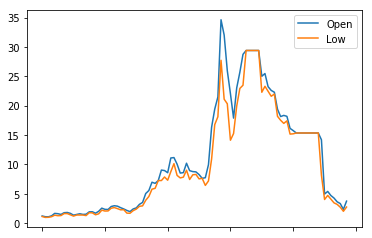

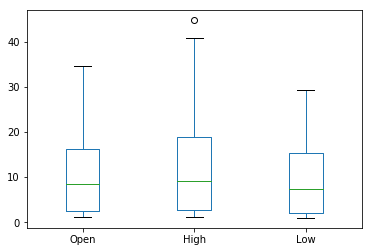

In [37]:
stock_m[['Open','Low']].plot.line()
stock_m.iloc[:,:3].plot.box()

收盘价曲线

In [21]:
open = stock['Open']

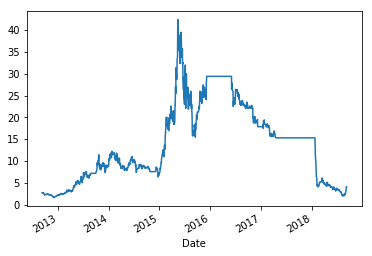

In [26]:
open.plot.line()